#### 19AIE312 - Deep Learning for Signal and Image Processing 
#### Assignment 2 - Evaluation 3 (Deep Neural Networks)
#### CB.EN.U4AIE19043
#### Meghna Menon


In [1]:
#importing the necessary libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import *

In [16]:
image_size = (48, 48)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\ADMIN\\Chessman-image-dataset\\Chess\\',
    validation_split=.2,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [17]:
validation = keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\ADMIN\\Chessman-image-dataset\\Chess\\',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [18]:
#exploring the data
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

(48, 48, 3)


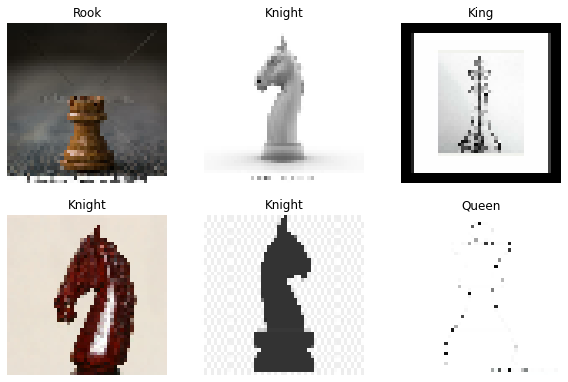

In [19]:
#displaying some of the training set samples
display_samples(train, 6, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

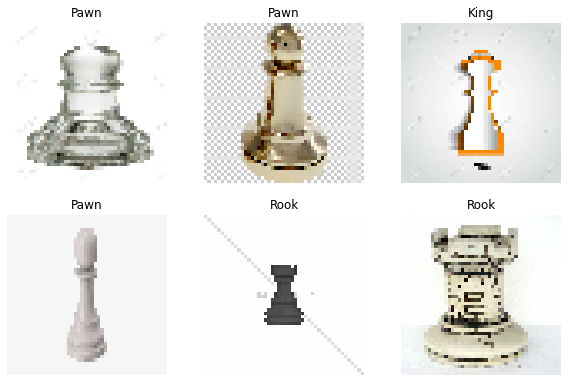

In [20]:
#displaying some of the validation set samples along with their class names
display_samples(validation, 6, validation.class_names)


In [21]:
class_names = train.class_names
labels = np.array([])
for _, label in train:
    labels = np.concatenate((labels, np.argmax(label, axis=-1)))
_, counts = np.unique(labels, return_counts=True)

In [22]:
total = counts.sum()
print("Frequence of data in each class:")
for i in range(len(counts)):
    print(f'{class_names[i]}: {counts[i]}({counts[i] / total:.2f}%)')

Frequence of data in each class:
Bishop: 71(0.16%)
King: 62(0.14%)
Knight: 85(0.19%)
Pawn: 83(0.19%)
Queen: 64(0.14%)
Rook: 77(0.17%)


In [36]:
#DNN Model
model = keras.Sequential()
model.add(Flatten(input_shape=(48,48,3)))

model.add(Dense(32,  activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(train.class_names), activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                221216    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
batch_normalization_4 (Batch (None, 6)                 24        
_________________________________________________________________
dropout_7 (Dropout)          (None, 6)                

In [37]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

epochs = 20
model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/20
14/14 [==============================] - 2s 49ms/step - loss: 1.9523 - accuracy: 0.1923 - val_loss: 10.2732 - val_accuracy: 0.2091
Epoch 2/20
14/14 [==============================] - 1s 42ms/step - loss: 1.9522 - accuracy: 0.2014 - val_loss: 5.2383 - val_accuracy: 0.2091
Epoch 3/20
14/14 [==============================] - 2s 44ms/step - loss: 1.9737 - accuracy: 0.1968 - val_loss: 3.5158 - val_accuracy: 0.1909
Epoch 4/20
14/14 [==============================] - 1s 40ms/step - loss: 1.9405 - accuracy: 0.1968 - val_loss: 2.6228 - val_accuracy: 0.2091
Epoch 5/20
14/14 [==============================] - 2s 43ms/step - loss: 1.8993 - accuracy: 0.2059 - val_loss: 1.9023 - val_accuracy: 0.0455
Epoch 6/20
14/14 [==============================] - 2s 43ms/step - loss: 1.8437 - accuracy: 0.2014 - val_loss: 2.0107 - val_accuracy: 0.1818
Epoch 7/20
14/14 [==============================] - 2s 41ms/step - loss: 1.7753 - accuracy: 0.2308 - val_loss: 2.0403 - val_accuracy: 0.1818
Epoch 8/20
1

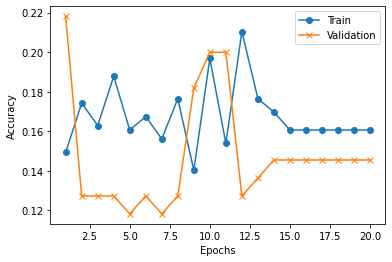

In [64]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
plt.plot(epochs_range, model.history.history['val_accuracy'], '-x',label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend();

 As a basic Deep Neural Network architecture is not able to derive the features of this dataset, a CNN model was created for the above given dataset.  In general, CNN tends to be a more powerful and accurate way of solving classification problems. ANN is still dominant for problems where datasets are limited, and image inputs are not necessary.CNN uses filters on an image results in feature maps which results in better compatibility with the images.

In [44]:
input_shape = (48,48,3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(256, (3, 3), padding="same", activation="relu", input_shape=image_size+ (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(train.class_names), activation='softmax'))


model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 48, 48, 256)       7168      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 64)        147520    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)             

In [46]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

epochs = 25
model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/25
14/14 [==============================] - 7s 370ms/step - loss: 1.1542 - accuracy: 0.6222 - val_loss: 2.5198 - val_accuracy: 0.1909
Epoch 2/25
14/14 [==============================] - 6s 370ms/step - loss: 1.1076 - accuracy: 0.6742 - val_loss: 2.2671 - val_accuracy: 0.2364
Epoch 3/25
14/14 [==============================] - 7s 381ms/step - loss: 0.9839 - accuracy: 0.7172 - val_loss: 3.0186 - val_accuracy: 0.3091
Epoch 4/25
14/14 [==============================] - 6s 374ms/step - loss: 0.9086 - accuracy: 0.7376 - val_loss: 3.4511 - val_accuracy: 0.1182
Epoch 5/25
14/14 [==============================] - 6s 384ms/step - loss: 0.7815 - accuracy: 0.7873 - val_loss: 2.1013 - val_accuracy: 0.2273
Epoch 6/25
14/14 [==============================] - 6s 375ms/step - loss: 1.0385 - accuracy: 0.7104 - val_loss: 2.1752 - val_accuracy: 0.2182
Epoch 7/25
14/14 [==============================] - 6s 376ms/step - loss: 1.0643 - accuracy: 0.6787 - val_loss: 1.9165 - val_accuracy: 0.3000
Epoch 

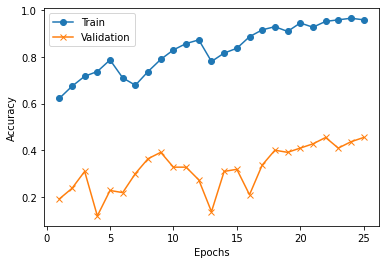

In [47]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')
plt.plot(epochs_range, model.history.history['val_accuracy'], '-x',label='Validation')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend();

In [27]:
print(image_size[0])

48


In [29]:
print(image_size[1])

48


In [62]:
X.shape

(8, 3)

In [63]:
W1.shape

(3, 5)